In [1]:
import pandas as pd

In [24]:
df = pd.read_csv("../../data/mendeley/HateSpeechDatasetBalanced.csv")
df.columns = df.columns.str.lower()

df.head()

,content,label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


### data preparation

In [43]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tweets = df['content'].tolist()
labels = df['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets) ## tokenizer fit to our vocabulary

tweet_sequences = tokenizer.texts_to_sequences(tweets)

max_sequence_length = 55  ## padding to ensure uniformity in length of the sequences
tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')
print(tweet_padded[:2])
labels = np.array(labels)

[[ 2091     8   683     1  3998    18   635     2   256    16 22961    38
   2496   840     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]
 [   37    43    87   568     2  2184    15 12837   492  2663   305     3
    800     4   423     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]


In [4]:
## the cnn model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

embedding_dim = 55 
vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, labels, test_size=0.2, random_state=42)

# Train the model
epochs = 5 
batch_size = 32  

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 824s 45ms/step - accuracy: 0.8210 - loss: 0.3834 - val_accuracy: 0.8754 - val_loss: 0.2852
Epoch 2/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 802s 44ms/step - accuracy: 0.9073 - loss: 0.2212 - val_accuracy: 0.8865 - val_loss: 0.2652
Epoch 3/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 805s 44ms/step - accuracy: 0.9414 - loss: 0.1488 - val_accuracy: 0.8898 - val_loss: 0.2751
Epoch 4/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 845s 47ms/step - accuracy: 0.9582 - loss: 0.1079 - val_accuracy: 0.8931 - val_loss: 0.2876
Epoch 5/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 835s 46ms/step - accuracy: 0.9696 - loss: 0.0803 - val_accuracy: 0.8916 - val_loss: 0.3131


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 55, 55)         │     7,536,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,739,909 (86.75 MB)

 Trainable params: 7,579,969 (28.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,159,940 (57.83 MB)

In [22]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


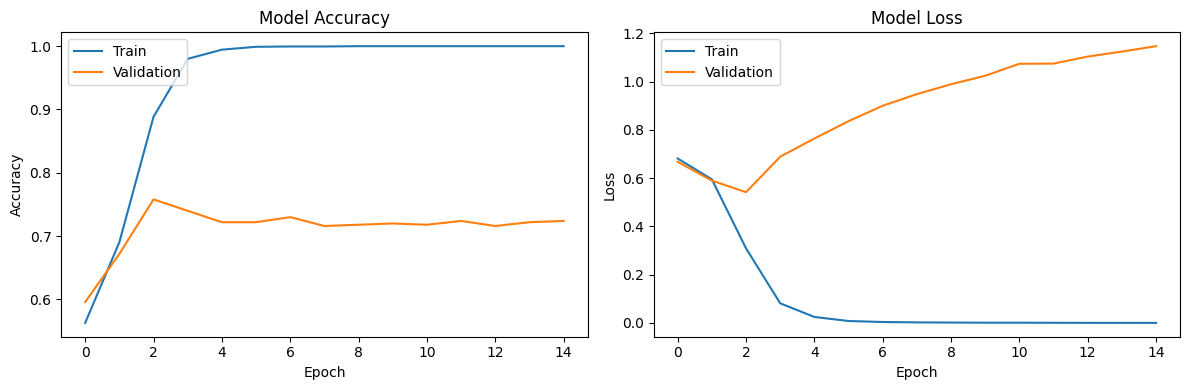

In [24]:
plot_training_history(history)


In [ ]:
## Using custom tokenizer:
from transformers import BertTokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tweets = df['content'].tolist()
labels = df['label'].tolist()

# tokenizer = BertTokenizer.from_pretrained("../../custom_bert_tokenizer_mendeley")
# tokenizer.tokenize(tweets) ## tokenizer fit to our vocabulary
## vectorize it 
# tweet_sequences = tokenizer.texts_to_sequences(tweets)

max_sequence_length = 55  ## padding to ensure uniformity in length of the sequences
tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')
print(tweet_padded[:2])
labels = np.array(labels)


In [15]:
## the cnn model 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

embedding_dim = 55 
vocab_size = len(tokenizer.word_index) + 1

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_2          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, labels, test_size=0.2, random_state=42)

# Train the model
epochs = 15 
batch_size = 32  

# reduce the dataset for faster execution time
X_train, y_train = X_train[:2000], y_train[:2000]
X_val, y_val = X_val[:500], y_val[:500]
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.5385 - loss: 0.6867 - val_accuracy: 0.5960 - val_loss: 0.6679
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6725 - loss: 0.6250 - val_accuracy: 0.6720 - val_loss: 0.5898
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8816 - loss: 0.3447 - val_accuracy: 0.7580 - val_loss: 0.5419
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.9830 - loss: 0.0847 - val_accuracy: 0.7400 - val_loss: 0.6888
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - accuracy: 0.9966 - loss: 0.0223 - val_accuracy: 0.7220 - val_loss: 0.7644
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.9979 - loss: 0.0090 - val_accuracy: 0.7220 - val_loss: 0.8361
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.7300 - val_loss: 0.9001
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.9990 - loss: 0.0032 - val_accuracy: 0.7160 - v

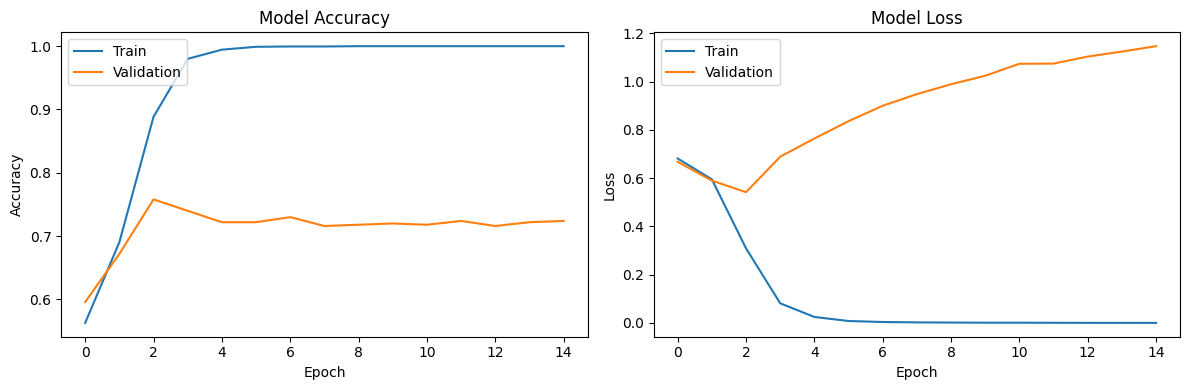

In [25]:
plot_training_history(history)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 55, 55)         │     1,076,515 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 51, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,360,494 (12.82 MB)

 Trainable params: 1,120,164 (4.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,240,330 (8.55 MB)

Model with smaller dataset trains and validates well for a while, but afterwards it starts to overfit. 

## Finetuning

Adding some dropout layers

In [27]:
from tensorflow.keras.layers import Dropout
model_dropout = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_dropout.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_dropout.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_5          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history_dropout = model_dropout.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - accuracy: 0.5314 - loss: 0.6922 - val_accuracy: 0.6000 - val_loss: 0.6818
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5846 - loss: 0.6696 - val_accuracy: 0.5860 - val_loss: 0.6635
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6645 - loss: 0.6099 - val_accuracy: 0.6440 - val_loss: 0.6159
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8110 - loss: 0.4476 - val_accuracy: 0.7280 - val_loss: 0.5541
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9261 - loss: 0.2056 - val_accuracy: 0.7320 - val_loss: 0.6384
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9743 - loss: 0.0893 - val_accuracy: 0.7380 - val_loss: 0.7307
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9889 - loss: 0.0395 - val_accuracy: 0.7440 - val_loss: 0.8395
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9991 - loss: 0.0168 - val_accuracy: 0.7340 - val_loss: 0.

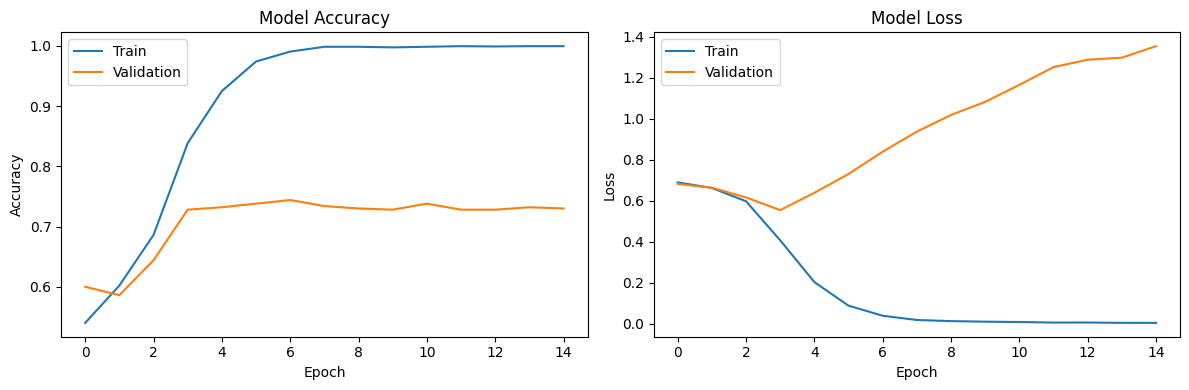

In [29]:
plot_training_history(history_dropout)


Not much has changed, adding batch normalization and regularization 

In [30]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2

model_regularization = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model_regularization.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

model_regularization.summary()

c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_6          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
history_regularization = model_regularization.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))


Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - accuracy: 0.5169 - loss: 1.0339 - val_accuracy: 0.5060 - val_loss: 0.8500
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.5896 - loss: 0.8959 - val_accuracy: 0.5060 - val_loss: 0.8445
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.6409 - loss: 0.8018 - val_accuracy: 0.5800 - val_loss: 0.8329
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.7303 - loss: 0.6658 - val_accuracy: 0.6360 - val_loss: 0.8146
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8435 - loss: 0.5104 - val_accuracy: 0.7100 - val_loss: 0.7719
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9162 - loss: 0.3843 - val_accuracy: 0.7180 - val_loss: 0.7359
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.9506 - loss: 0.2983 - val_accuracy: 0.7360 - val_loss: 0.7022
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.9746 - loss: 0.2354 - val_accuracy: 0.7280 - v

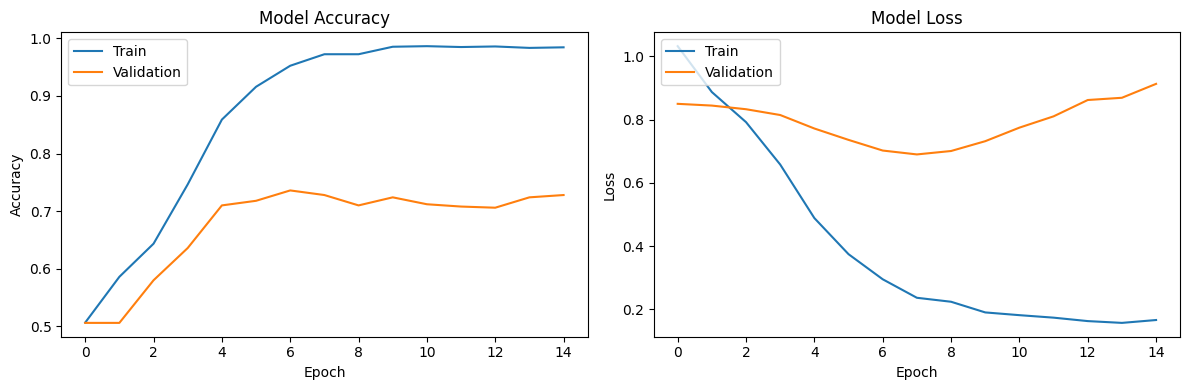

In [33]:
plot_training_history(history_regularization)

Slightly better, or model generalizes at each epoch, but the validation loss signficiatnly increases after epoch 8. 
- adding spacial dropout layer after embedding
- additional dense layer


In [35]:
from tensorflow.keras.layers import  SpatialDropout1D

model_spatial = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_sequence_length),
    SpatialDropout1D(0.2),
    Conv1D(128, 5, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_spatial.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

model_spatial.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ ?                      │   0 (unbuilt) │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_8          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [37]:
history_spatial = model_spatial.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.5215 - loss: 1.2101 - val_accuracy: 0.5060 - val_loss: 1.0192
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5113 - loss: 1.1739 - val_accuracy: 0.5060 - val_loss: 1.0220
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.5373 - loss: 1.0957 - val_accuracy: 0.5060 - val_loss: 1.0668
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5494 - loss: 1.0454 - val_accuracy: 0.5060 - val_loss: 1.0333
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5592 - loss: 1.0272 - val_accuracy: 0.5060 - val_loss: 1.0255
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5979 - loss: 0.9691 - val_accuracy: 0.5060 - val_loss: 1.0265
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.5965 - loss: 0.9704 - val_accuracy: 0.5060 - val_loss: 1.0365
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.6381 - loss: 0.9329 - val_accuracy: 0.5060 - v

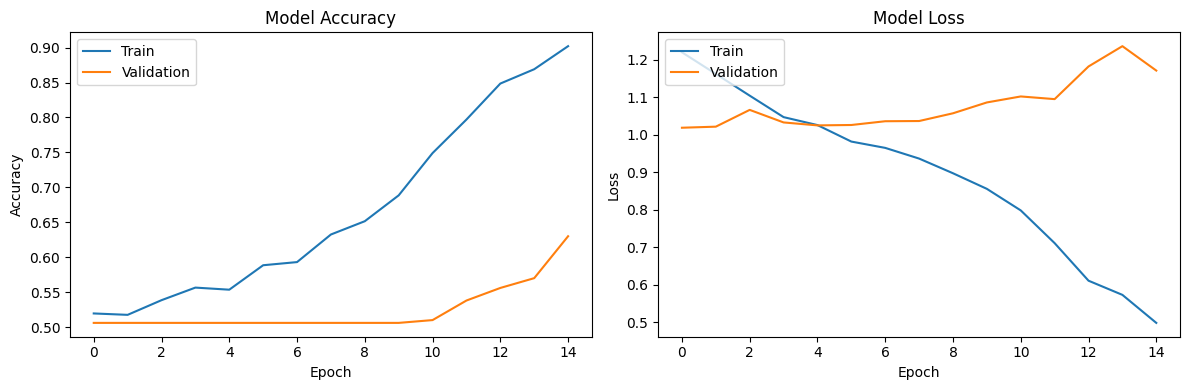

In [38]:
plot_training_history(history_spatial)

This got even worse, we will the earlier model changes for model_regularization. 

In [ ]:
# TODO: try 30 epochs for above

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plotting training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


In [ ]:
df = pd.read_csv("../../data/mendeley/HateSpeechDatasetBalanced.csv")
df.columns = df.columns.str.lower()

df.head()
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

tweets = df['content'].tolist()
labels = df['label'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets) ## tokenizer fit to our vocabulary

tweet_sequences = tokenizer.texts_to_sequences(tweets)

max_sequence_length = 55  ## padding to ensure uniformity in length of the sequences
tweet_padded = pad_sequences(tweet_sequences, maxlen=max_sequence_length, padding='post')
print(tweet_padded[:2])
labels = np.array(labels)

In [ ]:
# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(tweet_padded, labels, test_size=0.2, random_state=42)

# Train the model
epochs = 5 
batch_size = 32  

In [44]:
## Simplified version of the cnn from the forked repo on git

import tensorflow as tf
from tensorflow.keras import layers, models

def build_simple_cnn_text_model(vocab_size, embed_dim, class_num, kernel_num, kernel_sizes, dropout, padding_idx, sequence_length):
    # Input layer for sequences of fixed length
    input_layer = tf.keras.Input(shape=(sequence_length,), dtype='int32')
    
    # Embedding layer
    embedding_layer = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim, mask_zero=True)(input_layer)
    
    # Convolution + ReLU + Max Pooling
    conv_outputs = []
    for kernel_size in kernel_sizes:
        conv = layers.Conv1D(filters=kernel_num, kernel_size=kernel_size, activation='relu')(embedding_layer)
        pooled = layers.GlobalMaxPooling1D()(conv)
        conv_outputs.append(pooled)
    
    # Concatenate pooled outputs
    concatenated = layers.concatenate(conv_outputs, axis=-1)  # (N, len(Ks) * Co)
    
    # Apply dropout
    dropout_layer = layers.Dropout(rate=dropout)(concatenated)
    
    # Fully connected layer
    output_layer = layers.Dense(units=class_num, activation='softmax')(dropout_layer)
    
    # Build the model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    
    return model

# Example usage
vocab_size = len(tokenizer.word_index) + 1 ## from keras.tokenizer on tweets
embed_dim = 55
class_num = 1  # Assuming there are 10 classes
kernel_num = 100
kernel_sizes = [3, 4, 5]
dropout = 0.5
padding_idx = 0
sequence_length = 55  # Fixed length of sequences



model_dalinvip_tf = build_simple_cnn_text_model(vocab_size, embed_dim, class_num, kernel_num, kernel_sizes, dropout, padding_idx, sequence_length)
model_dalinvip_tf.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
model_dalinvip_tf.summary()



c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\layer.py:877: UserWarning: Layer 'conv1d_23' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\layer.py:877: UserWarning: Layer 'conv1d_24' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(
c:\Users\bemne\anaconda3\envs\al\Lib\site-packages\keras\src\layers\layer.py:877: UserWarning: Layer 'conv1d_25' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 55)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 55, 55)    │  7,536,320 │ input_layer_12[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_23 (Conv1D)  │ (None, 53, 100)   │     16,600 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_24 (Conv1D)  │ (None, 52, 100)   │     22,100 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_25 (Conv1D)  │ (None, 51, 100)   │     27,600 │ embedding_12[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 100)       │          0 │ conv1d_23[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 100)       │          0 │ conv1d_24[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 100)       │          0 │ conv1d_25[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 300)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 300)       │          0 │ concatenate_6[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 1)         │        301 │ dropout_13[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,602,921 (29.00 MB)

 Trainable params: 7,602,921 (29.00 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
history_dalinvip_tf = model_dalinvip_tf.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_val, y_val))
X_train.shape, y_train.shape, X_val.shape, y_val.shape

Epoch 1/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 840s 46ms/step - accuracy: 0.5011 - loss: 0.3136 - val_accuracy: 0.5039 - val_loss: 0.2939
Epoch 2/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 935s 51ms/step - accuracy: 0.5021 - loss: 0.2356 - val_accuracy: 0.5039 - val_loss: 0.2774
Epoch 3/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 917s 51ms/step - accuracy: 0.5010 - loss: 0.1892 - val_accuracy: 0.5039 - val_loss: 0.2823
Epoch 4/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 912s 50ms/step - accuracy: 0.5004 - loss: 0.1605 - val_accuracy: 0.5039 - val_loss: 0.2897
Epoch 5/5
18153/18153 ━━━━━━━━━━━━━━━━━━━━ 896s 49ms/step - accuracy: 0.5016 - loss: 0.1385 - val_accuracy: 0.5039 - val_loss: 0.3054


((580895, 55), (580895,), (145224, 55), (145224,))

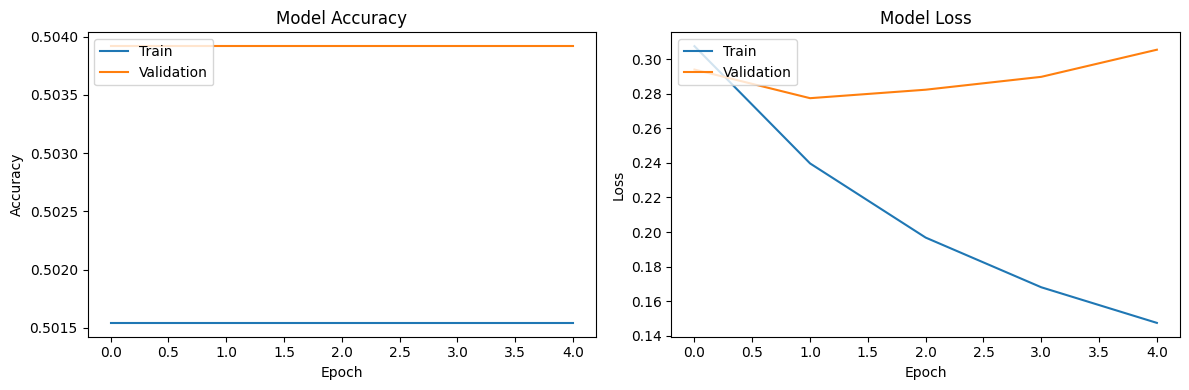

In [47]:
plot_training_history(history_dalinvip_tf)